# "Oh, the things we can do with a 2D nonlinear system"
> "We're using sympy and a few custom features to carry out traditional analyses of a nonlinear ODE system"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [MATH280]

In my differential equations class, we use python for symbolic computation by default, explicitly calling on other libraries as needed.  We've written and collected a collection of utilities in the [MATH280 module](https://github.com/ejbarth/MATH280) for some tasks that weren't implemented (to our knowledge) or felt awkward.  We'll test drive a few of those features here as we explore the behavior of a 2-dimensional nonlinear equation.

In [13]:
from sympy import *

## Some traditional symbolic analysis

We'll first define the symbolic system of nonlinear equations and use the symbolic `solve()` to find equilibrium solutions

In [2]:
x,y=symbols("x y")
f1=-2*x-y**2
f2=x-2*y

eqs=solve([f1,f2],[x,y])
eqs

[(-8, -4), (0, 0)]

We can symbolically generate the linearization matrix by manipulating our original functions $f_1(x,y)$ and $f_2(x,y)$ and check the eigenvalues at the equilibria, noting that $(0,0)$  is stable and $(8, -4)$ is an unstable saddle.

In [3]:
L=Matrix([[f1.diff(x),f1.diff(y)],[f2.diff(x),f2.diff(y)]])
L

Matrix([
[-2, -2*y],
[ 1,   -2]])

In [4]:
L.subs({x:eqs[1][0],y:eqs[1][1]}).eigenvals()

{-2: 2}

In [5]:
L.subs({x:eqs[0][0],y:eqs[0][1]}).eigenvals()

{-2*sqrt(2) - 2: 1, -2 + 2*sqrt(2): 1}

Especially when we can't find equilibrium solutions symbolically, zero isoclines can be really helpful in understanding qualitative behavior of solutions, and the task requires less from `solve()`

In [6]:
isocline1=solve(f1,y)
isocline2=solve(f2,y)

isocline1, isocline2

([-sqrt(2)*sqrt(-x), sqrt(2)*sqrt(-x)], [x/2])

We can use the sympy `plot()` to draw the graphs of the symbolic zero isocline expressions returned by `solve()`

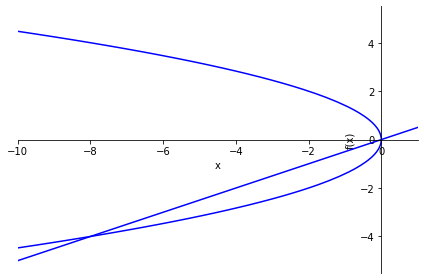

In [7]:
plot(isocline1[0],
     isocline1[1],
     isocline2[0],
     xlim=(-10,1),line_color="blue")

## Direction Fields for Symbolic Expressions

In the [MATH280 module](https://github.com/ejbarth/MATH280), we've included a direction field plotter `drawdf()` that bridges the symbolic/numeric divide.  `drawdf()` takes a symbolic expression and draws a direction field plot using numerical data generated behind the scenes.  An axis handle is returned so that further changes to the plot can be made.  Below, we draw the direction field for the 2D system, along with a few representative solutions using the `soln_at` option.  Then the zero isoclines are plotted on the same set of axes.

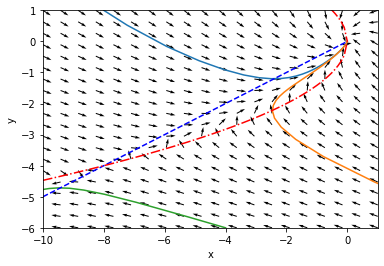

In [17]:
import MATH280
from numpy import linspace, sqrt

xx=linspace(-10,0,100)

ax=MATH280.drawdf([f1,f2],[x,-10,1],[y,-6,1],soln_at=[[-8,1],[2,-5],[-4,-6]])
ax.plot(xx,xx/2,"b--")
ax.plot(xx,-sqrt(2)*sqrt(-xx),"r-.",xx,sqrt(2)*sqrt(-xx),"r-.")

## Numerical Solution for Symbolic Equations

We'd like to have the ability to easily call for a numerical solution of symbolic equation.  In the [MATH280 module](https://github.com/ejbarth/MATH280), we've included two numerical solvers (based on `scipy.integrate.solve_ivp()`) that, like:  `drawdf()` bridge the symbolic/numeric divide:
* `rkf45(symbolic_rhs_expression,dep_vars_list,dep_vars_initvals,ind_var_list)`: for general use
* `BDF(symbolic_rhs_expression,dep_vars_list,dep_vars_initvals,ind_var_list)`: for equations known to be stiff

In [18]:
t=symbols("t")
ns=MATH280.rkf45([f1,f2],[x,y],[-3,2],[t,0,10])

Having jumped the gap from symbolics and numerics, the output `ns` is a list of numerical arrays. We'll plot with `matplotlib`

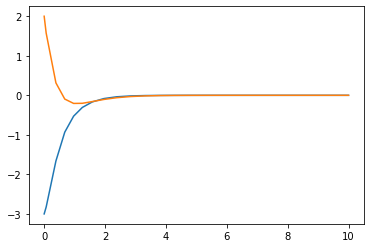

In [10]:
import matplotlib.pyplot as plt
plt.plot(ns[0],ns[1][0],ns[0],ns[1][1])

Of course, we could call `solve_ivp()` directly with a defined right-hand-side function:

In [11]:
def vrhs(t,xy):
    return [-2*xy[0]-xy[1]**2, xy[0] - 2*xy[1]]

from scipy.integrate import solve_ivp

nsol=solve_ivp(vrhs,[0, 5],[2,-2])

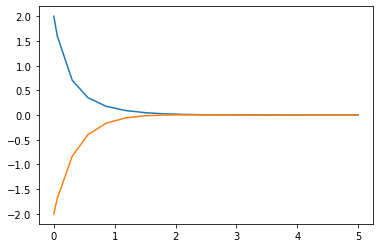

In [12]:
plt.plot(nsol.t,nsol.y[0])
plt.plot(nsol.t,nsol.y[1])